In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import investpy
import cryptocompare
from datetime import datetime

# For plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
sns.set_theme(style='darkgrid', palette='deep')

df =  pd.read_csv('Data.csv')

In [2]:
df

,coin,amount,price_EUR,fees_EUR,date_purchased
0,BTC,0.005842,72.16,2.84,21/08/2020
1,BTC,0.008702,190.75,0.00,07/06/2020
2,BTC,0.009843,88.16,2.84,14/04/2020
3,BTC,0.016705,221.75,0.00,03/03/2020
4,DNT,243.160569,56.01,4.99,21/02/2020
5,DNT,500.160569,25.01,4.99,25/02/2020
6,ETH,0.082635,72.16,9.84,21/04/2020
7,ETH,0.226705,135.25,2.74,23/07/2020
8,ETH,0.012076,152.97,2.26,07/08/2020
9,LINK,2.089757,68.69,1.99,21/09/2020


In [3]:
initialPriceEUR = sum(df['price_EUR'])
totalFees = sum(df['fees_EUR'])

In [4]:
df['coin']
groupedByType = df.groupby('coin')['price_EUR'].sum()
groupedByType

coin
BTC     572.82
DNT      81.02
ETH     360.38
LINK     91.38
Name: price_EUR, dtype: float64

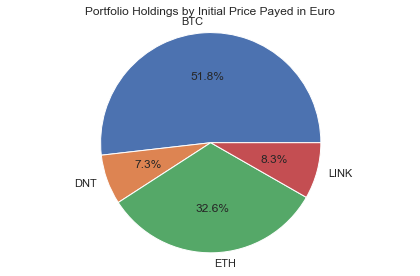

In [5]:
plt.pie(groupedByType,labels=('BTC','DNT','ETH','LINK'),autopct='%1.1f%%')
plt.title('Portfolio Holdings by Initial Price Payed in Euro')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Crypto Price Retrieval

The following uses the CryptoCompare API to retrieve the current price for each respective Crypto Currency:

In [6]:
dfBTC = cryptocompare.get_price('BTC')['BTC']['EUR']
dfETH = cryptocompare.get_price('ETH')['ETH']['EUR']
dfLINK = cryptocompare.get_price('LINK')['LINK']['EUR']
dfDNT = cryptocompare.get_price('DNT')['DNT']['EUR']

# Portfolio Status

## Current Value with Fees Deducted

In [7]:
groupedByAmount = df.groupby('coin')['amount'].sum()
print(groupedByAmount)
btc = groupedByAmount[0]*(dfBTC)
dnt = groupedByAmount[1]*(dfDNT)
eth = groupedByAmount[2]*(dfETH)
link = groupedByAmount[3]*(dfLINK)

currentValueNoFees = btc + dnt + eth + link
currentValueFeesDeducted = currentValueNoFees - totalFees

print("Current total value of the portfolio, fees deducted:")
currentValueFeesDeducted

coin
BTC       0.041092
DNT     743.321139
ETH       0.321416
LINK      9.142413
Name: amount, dtype: float64
Current total value of the portfolio, fees deducted:


2758.18094926908

## Percentage Difference from Initial Purchase, with Fees Deducted

In [8]:
print("Percentage difference from initial purchase of the entire portfolio, fees deducted:")
((currentValueFeesDeducted - initialPriceEUR) / initialPriceEUR) * 100.0

Percentage difference from initial purchase of the entire portfolio, fees deducted:


149.4736748615304

## Profit from Initial Purchase, Fees and Capital Gains Tax Deducted

Capital gains tax is assumed to be 19 percent.

In [9]:
print("Profit from initial purchase of the entire portfolio, fees and capital gains tax deducted")
(currentValueFeesDeducted - initialPriceEUR) - (0.19 * (currentValueNoFees - initialPriceEUR))

Profit from initial purchase of the entire portfolio, fees and capital gains tax deducted


1332.039368907955

# Crypto Currency Information Retrieval

This section retrieves the historical price information of each crypto currency within the portfolio since January 1st 2020, up until the present date that the code is run.

In [10]:
todaysDate = datetime.today().strftime('%d/%m/%Y')

In [11]:
dfBTC_info = investpy.crypto.get_crypto_information(crypto='bitcoin', as_json=False)
dfBTC_hist_info = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2020', to_date=todaysDate)

dfETH_info = investpy.crypto.get_crypto_information(crypto='ethereum', as_json=False)
dfETH_hist_info = investpy.get_crypto_historical_data(crypto='ethereum', from_date='01/01/2020', to_date=todaysDate)

dfDNT_info = investpy.crypto.get_crypto_information(crypto='district0x', as_json=False)
dfDNT_hist_info = investpy.get_crypto_historical_data(crypto='district0x', from_date='01/01/2020', to_date=todaysDate)

dfLINK_info = investpy.crypto.get_crypto_information(crypto='chainlink', as_json=False)
dfLINK_hist_info = investpy.get_crypto_historical_data(crypto='chainlink', from_date='01/01/2020', to_date=todaysDate)

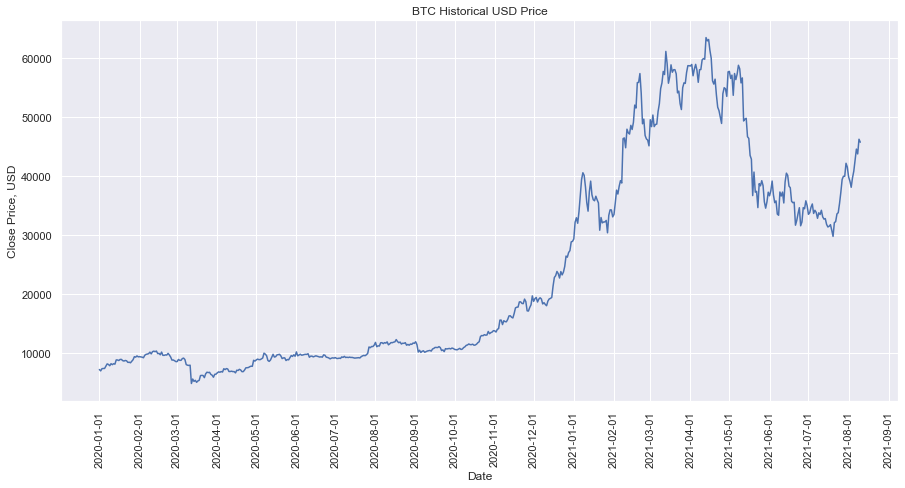

In [12]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(x=dfBTC_hist_info.index, y=dfBTC_hist_info['Close']).set_title('BTC Historical USD Price')

# specify the position of the major ticks at the first day of the month, with a month interval of 1
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Close Price, USD')

# show the plot
plt.show()

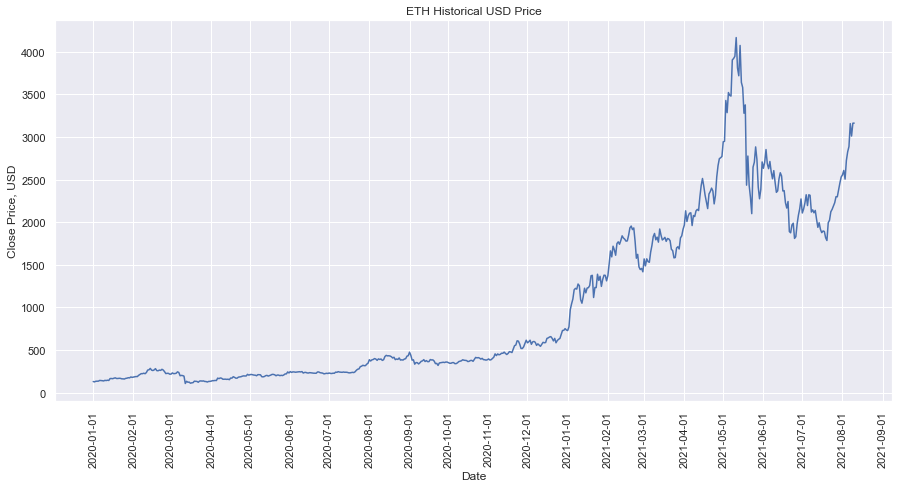

In [13]:
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(x=dfETH_hist_info.index, y=dfETH_hist_info['Close']).set_title('ETH Historical USD Price')

ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

plt.xlabel('Date')
plt.ylabel('Close Price, USD')

plt.show()

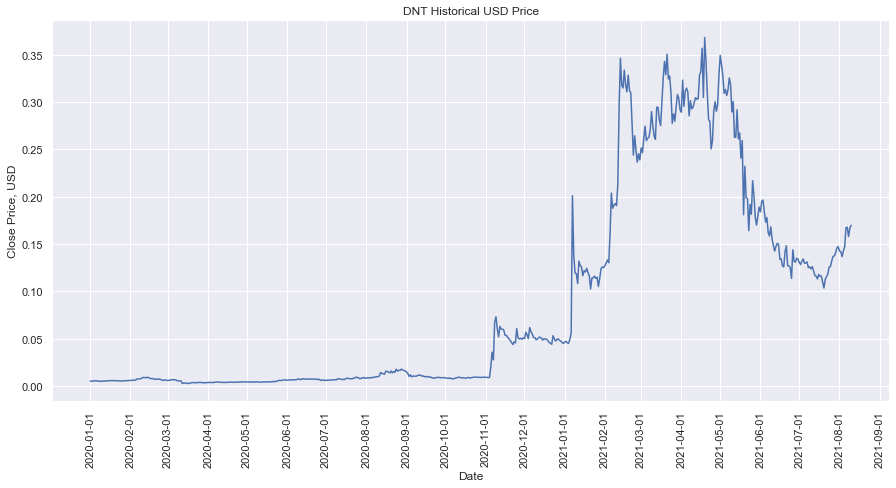

In [14]:
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(x=dfDNT_hist_info.index, y=dfDNT_hist_info['Close']).set_title('DNT Historical USD Price')
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

plt.xlabel('Date')
plt.ylabel('Close Price, USD')

plt.show()

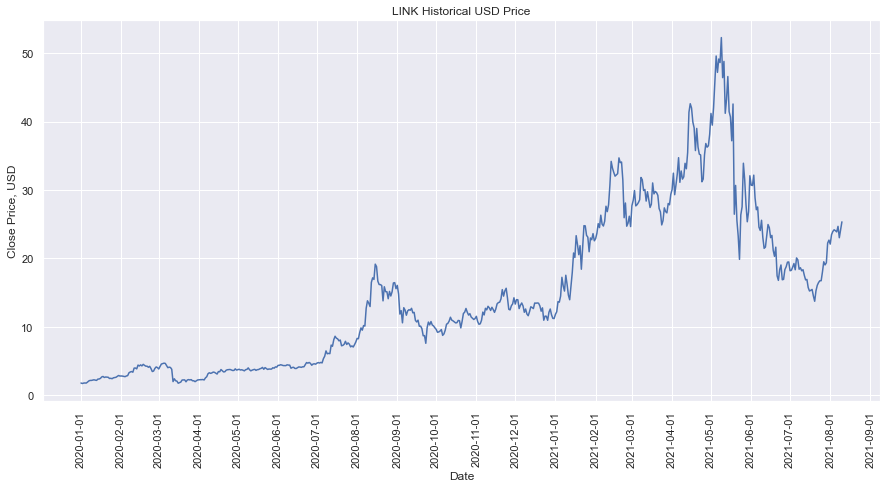

In [15]:
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(x=dfLINK_hist_info.index, y=dfLINK_hist_info['Close']).set_title('LINK Historical USD Price')

ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

plt.xlabel('Date')
plt.ylabel('Close Price, USD')

plt.show()